<a href="https://colab.research.google.com/github/vazhanio/test/blob/main/gpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
import cv2

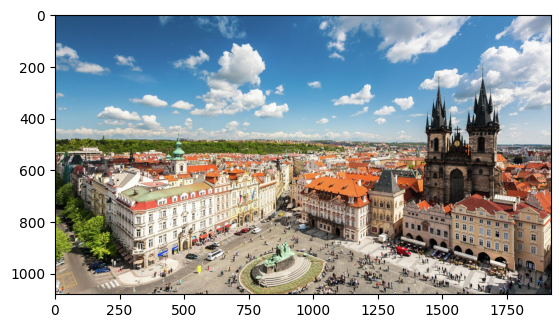

In [ ]:
src='0.jpg'
img=cv2.imread(src)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img) #

In [ ]:
#Есть функция которая имитирует обработку картинки. оно просто переводит картинку в чёрнобелое,
#но добавляет артефакт ( в виде рамки шириной в 50 пикселей голубго цвета )
#Фунцкия принмиает на фход изорбражение только разрешения 512х512 пикселей
#Если функция принимает другое разрешение, то она возвращает None
def stylize(image,checl_size=True):
    h,w,c=image.shape
    if h != 512 and w != 512 and checl_size:
        return None
    img=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) #переводим в чёрнобелое
    img=cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)  # переводис в РГБ но чёрнобелую картинку

    img=cv2.rectangle(img,(0,0),(w,h),(0,255,255),100) # рисует артефакт в виде рамки
    return img

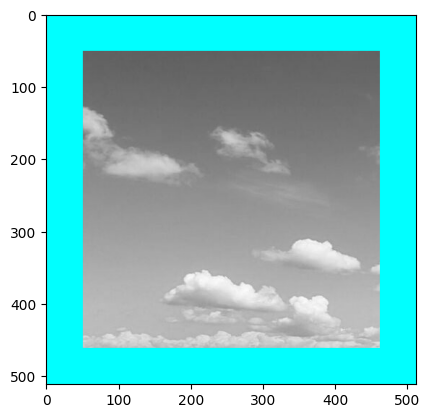

In [ ]:
#как выглядит обработка первого верхнего тайтла
first_tile=stylize(img[:512,:512,...].copy())
plt.imshow(first_tile)

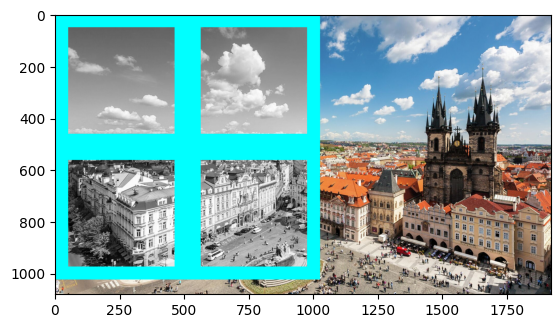

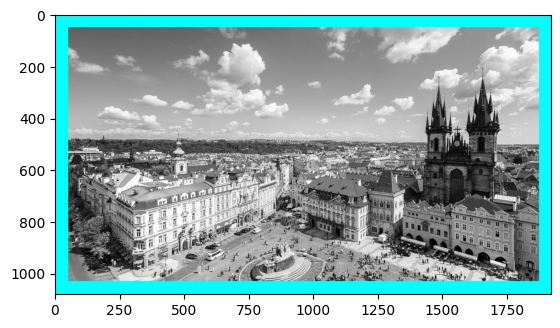

In [ ]:
#задача 1
# надо обработать фотографию ЛЮБОГО разрешения ( наме более 512 пикселей так и менее) этой функцией
# 1.1 разбить исходное изображение на плитки 512х512 пикселей и обработать функцией
# 1.2 собрать плитки в исходное изображение такого же разрешений
#НО не должно быть артефактов внутри картинки, допускается рамка в большом изображении.
#_____________ далее эмитирую обработку первых четырёк тайтлов , но бкез убраных артефактов
#!!!!!! в примере показаны обработки только первых ЧЕТЫРЁХ тайтлов, надо обработать всё картинку
t_00=stylize(img[:512,:512,...])
t_01=stylize(img[:512,512:1024,...])
t_10=stylize(img[512:1024,:512,...])
t_11=stylize(img[512:1024,512:1024])
img_new=img.copy()
img_new[:512,:512,...]=t_00
img_new[:512,512:1024,...]=t_01
img_new[512:1024,:512,...]=t_10
img_new[512:1024,512:1024,...]=t_11
plt.figure()
plt.imshow(img_new)
#рамки внутри картинки недопустимы!!!! Рамки внешние лрпустимы
#на первой картинке недоупстимые рамки внутри картинки
#на второй картинке что надо получить
plt.figure()
plt.imshow(stylize(img,False))